In [23]:
# Importamos las librerías necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### EDA

#### Criterios para la elección de las 10 criptomonedas que analizaremos:

* Adopción en el espacio DeFi(Decentralized finance).
* Alta capitalización de mercado.
* Mínimo 5 años en el ecosistema crypto. 
* Diversidad en volatilidad y riesgo.
* Vínculos con instituciones financieras centralizadas y tradicionales

De forma más específica podemos mencionar:

* Bitcoin, Ethereum y Litecoin son fundamentales para cualquier análisis de criptomonedas debido a su liderazgo en capitalización de mercado y adopción. Lo mismo podemos decir de Binance Coin, que representa una moneda de intercambio exitosa con utilidades en el ecosistema Binance.
* Cardano está basada en principios de investigación y validación científica lo que puede mejorar la seguridad de la plataforma.  Presenta movimientos de precio más moderados. 
* Chainlink aborda problemas de interoperabilidad y confiabilidad de datos en el ecosistema de cadenas de bloques.
* La inclusión de dos stablecoins como USDT y USDC en una cartera puede ayudar a mitigar el riesgo asociado con la volatilidad superior de otras criptomonedas. 
* Ripple, Binance y Stellar tienen acuerdos con instituciones financieras tradicionales. 

Activo de bajo riesgo, ayuda a equilibrar cartera. 


In [24]:
coins = pd.read_csv("data/coins.csv")

In [25]:
coins.head()

,prices,market_caps,total_volumes,datetime,year,month,day,id,ticker
0,6267.768709,1.077888e+11,6.619548e+09,2018-08-16 00:00:00,2018,8,16,bitcoin,BTC
1,6309.385226,1.085788e+11,5.982589e+09,2018-08-17 00:00:00,2018,8,17,bitcoin,BTC
2,6566.715163,1.130186e+11,6.206194e+09,2018-08-18 00:00:00,2018,8,18,bitcoin,BTC
3,6382.060591,1.098899e+11,5.616966e+09,2018-08-19 00:00:00,2018,8,19,bitcoin,BTC
4,6475.494020,1.114910e+11,5.160365e+09,2018-08-20 00:00:00,2018,8,20,bitcoin,BTC


In [26]:
coins.describe()

,prices,market_caps,total_volumes,year,month,day
count,18219.000000,1.821900e+04,1.821900e+04,18219.000000,18219.000000,18219.000000
mean,2417.249504,7.170178e+10,9.859284e+09,2020.630166,6.518305,15.723146
std,8530.559825,1.665046e+11,2.156873e+10,1.491073,3.450532,8.795644
min,0.023716,0.000000e+00,2.025471e+04,2018.000000,1.000000,1.000000
25%,0.492177,3.058309e+09,3.695990e+08,2019.000000,4.000000,8.000000
50%,1.291351,1.181798e+10,1.645961e+09,2021.000000,7.000000,16.000000
75%,164.879684,5.063603e+10,8.816793e+09,2022.000000,10.000000,23.000000
max,67617.015545,1.278798e+12,9.267677e+11,2023.000000,12.000000,31.000000


In [27]:
coins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18219 entries, 0 to 18218
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   prices         18219 non-null  float64
 1   market_caps    18219 non-null  float64
 2   total_volumes  18219 non-null  float64
 3   datetime       18219 non-null  object 
 4   year           18219 non-null  int64  
 5   month          18219 non-null  int64  
 6   day            18219 non-null  int64  
 7   id             18219 non-null  object 
 8   ticker         18219 non-null  object 
dtypes: float64(3), int64(3), object(3)
memory usage: 1.3+ MB


Nulos y outliers

* El dataset no presenta valores nulos. 
* Como observamos en el siguiente gráfico de cajas, los outliers sobre todo en la variable precios se presentan en algunas criptomonedas, pero no los eliminamos porque, como demostraremos más adelante, es un mercado muy volátil y estos rangos extremos forman parte de su dinámica, por lo que la eliminación de estos datos puede distorsionar la exactitud de los cálculos.  

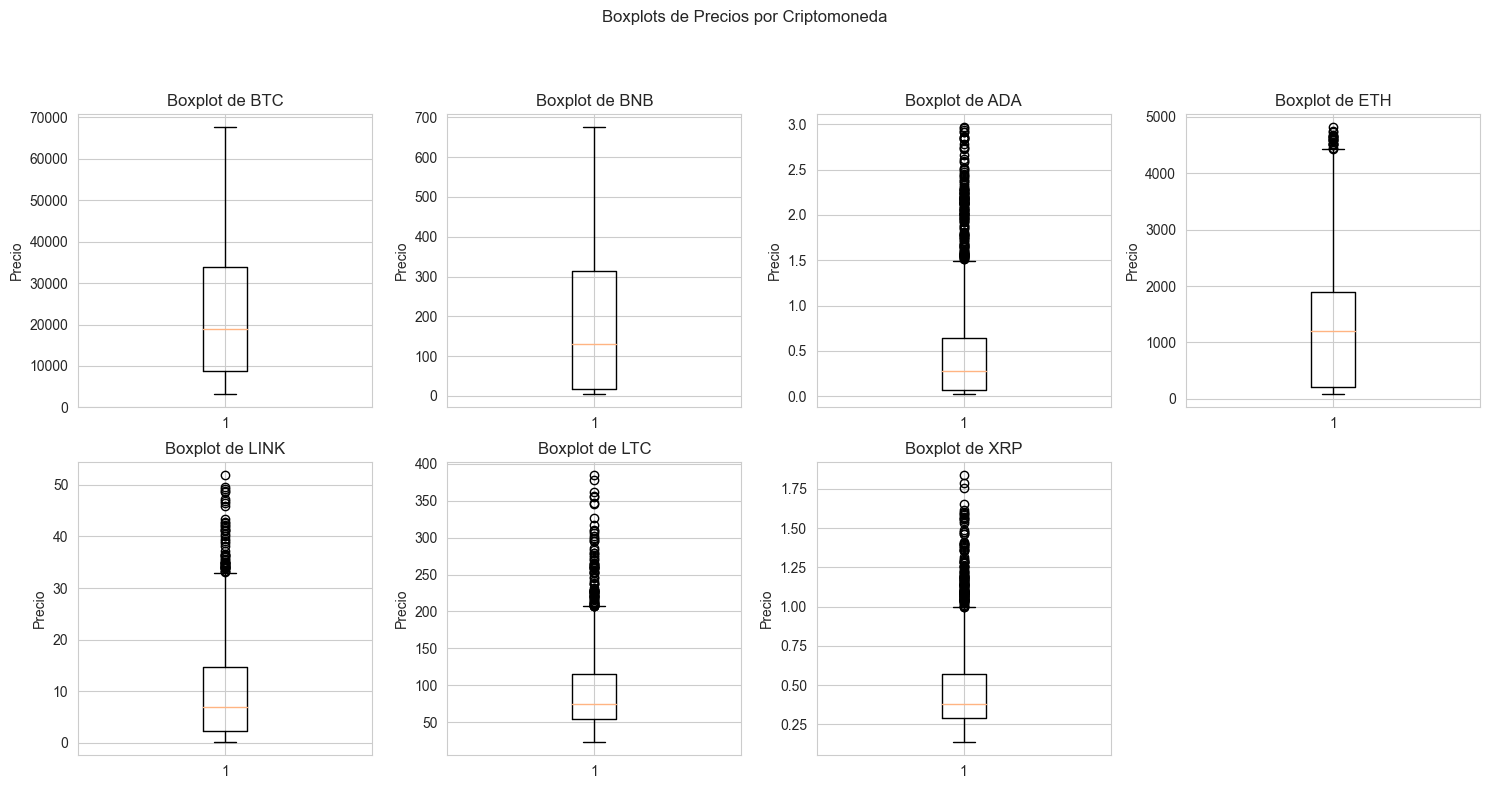

In [28]:
# Lista de tickers de las criptomonedas
tickers = ['BTC', 'BNB', 'ADA', 'ETH', 'LINK', 'LTC', 'XRP', 'XLM']

# Crear subplots en una cuadrícula
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
fig.suptitle('Boxplots de Precios por Criptomoneda')

# Iterar a través de los subplots y los tickers de las criptomonedas
for idx, ax in enumerate(axes.flatten()):
    if idx < len(tickers):
        ticker = tickers[idx]
        coin_data = coins[coins['ticker'] == ticker]
        
        ax.boxplot(coin_data['prices'])
        ax.set_title(f'Boxplot de {ticker}')
        ax.set_ylabel('Precio')
        ax.grid(True)

# Eliminar el último subplot vacío
fig.delaxes(axes[1, 3])

# Ajustar el espacio entre los subplots
plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Mostrar los boxplots
plt.show()

Top 10 precios máximos:

In [29]:
# Lista de tickers de las criptomonedas
tickers = ['BTC', 'BNB', 'ADA', 'ETH', 'LINK', 'LTC', 'XRP', 'XLM', 'USDT', 'USDC']

# Crear un DataFrame para almacenar los resultados
max_prices = []

# Iterar a través de los tickers de las criptomonedas
for ticker in tickers:
    # Filtrar los datos para la criptomoneda
    coin_data = coins[coins['ticker'] == ticker]
    
    # Encontrar el precio máximo
    max_price = coin_data['prices'].max()
    
    # Agregar el resultado al DataFrame de precios máximos
    max_prices.append({'Ticker': ticker, 'Max Price': max_price})

# Crear un DataFrame con los resultados
max_prices_df = pd.DataFrame(max_prices)

# Ordenar los resultados de mayor a menor
max_prices_df = max_prices_df.sort_values(by='Max Price', ascending=False)

print("Precios Máximos de las Criptomonedas:")
print(max_prices_df)

Precios Máximos de las Criptomonedas:
  Ticker     Max Price
0    BTC  67617.015545
3    ETH   4815.004634
1    BNB    675.098974
5    LTC    384.671618
4   LINK     51.851547
2    ADA      2.967075
6    XRP      1.837677
9   USDC      1.043465
8   USDT      1.015651
7    XLM      0.727540


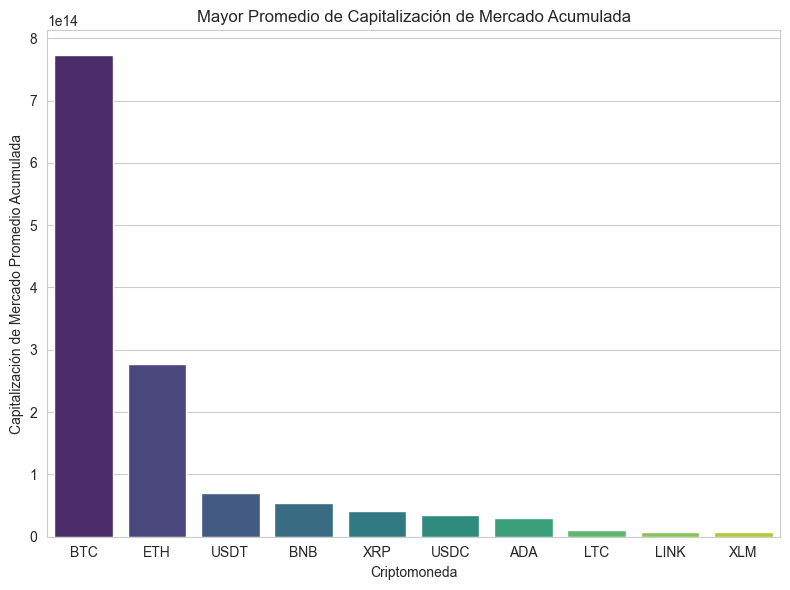

In [30]:
# Calcular la suma acumulada de la capitalización de mercado por grupo 'ticker'
coins['cumulative_avg_market_cap'] = coins.groupby('ticker')['market_caps'].cumsum()

# Seleccionar las monedas con mayor promedio acumulado de capitalización de mercado
top_coins = coins.groupby('ticker')['cumulative_avg_market_cap'].transform('max') == coins['cumulative_avg_market_cap']

# Filtrar los datos para las monedas seleccionadas
top_coins_data = coins[top_coins]

# Ordenar el DataFrame por capitalización de mercado promedio acumulada (de mayor a menor)
top_coins_data = top_coins_data.sort_values(by='cumulative_avg_market_cap', ascending=False)

# Crear el gráfico de barras verticales utilizando Seaborn
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

sns.barplot(x='ticker', y='cumulative_avg_market_cap', data=top_coins_data, palette='viridis')

plt.title('Mayor Promedio de Capitalización de Mercado Acumulada')
plt.xlabel('Criptomoneda')
plt.ylabel('Capitalización de Mercado Promedio Acumulada')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Eliminar la columna 'cumulative_avg_market_cap' del dataframe coins
coins = coins.drop(columns='cumulative_avg_market_cap')

Criptomonedas con mayores capitalizaciones de mercado pueden considerarse más establecidas y con una adopción significativa. También suelen tener una mayor liquidez lo que contribuye a facilitar su compra y venta. 
Vemos que entre las primeras 5 monedas con mayor capitalización acumulada tenemos despuntando a las clásicas Bitcoin y Ethereum más antiguas y establecidas y con usos bien definidos: Bitcoin como una forma de almacenar valor y Ethereum, pionera en el desarrollo de contratos inteligentes. 
En tercer lugar tenemos USDT, una stablecoin. Su alta capitalización se debe a que proporciona un refugio seguro en momentos de alta incertidumbre, pues su valor está respaldado por activos en moneda fiduciaria, como dólares estadounidenses, en una proporción de 1:1.
Binance Coin aparece en cuarto lugar, pero esto puede deberse a factores como que fue una criptomoneda inicialmente enfocada en el ecosistema Binance. Asimismo, es una cripto con mayores suministros que Bitcoin lo cual influye en su valoración. 
En quinto lugar tenemos a Ripple, que tiene un suministro de alrededor de 100 mil millones de tokens, lo que puede influir en su valor relativo. A diferencia de Bitcoin el mercado no la percibe como una reserva de valor, sino como una moneda utilizada para soluciones de pagos y transferencias. Rippple también ha atravesado controversias relacionadas con su regularización, lo cual afecta su cotización. 

Ahora bien, ¿una mayor capitalización está relacionada con un mayor precio de la moneda? Veamos: 

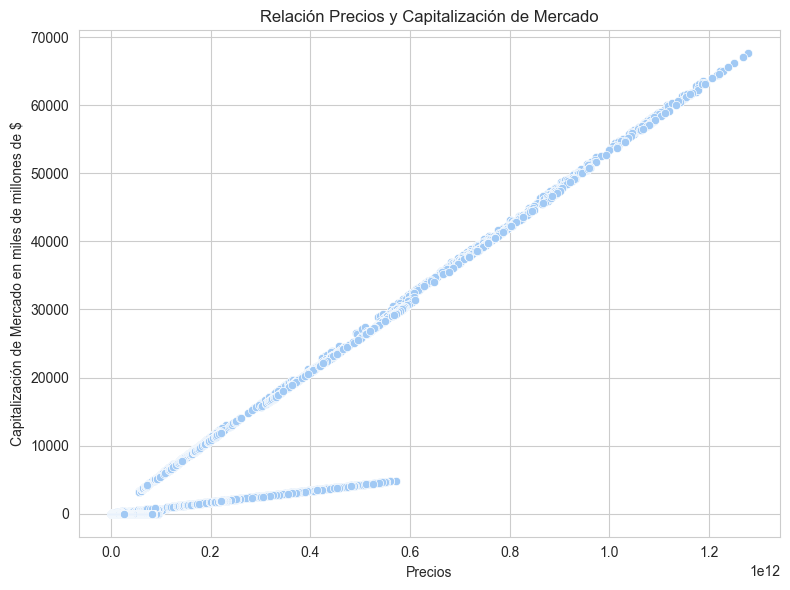

In [31]:
# Creamos uns scatter plot entre la variable market_caps y prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x='market_caps', y='prices', data=coins)
plt.title('Relación Precios y Capitalización de Mercado')
plt.xlabel('Precios')
plt.ylabel('Capitalización de Mercado en miles de millones de $')
plt.tight_layout()
plt.show()

Podemos observar claramente una relación directa: a mayor capitalización de mercado, mayor precio. Las dos rectas definen dos grupos de datos de criptos: el primero protagonizado por bitcoin y el segundo por las otras criptos. 
Una alta capitalización puede otorgar algunas ventajas para tomar decisiones de inversión. Pero debemos considerar que una capitalización alta indica también una madurez de la moneda, mientras que una baja capitalización tiene un potencial de expansión mayor. Una alta capitalización tampoco asegura una alta rentabilidad. Por lo tanto, debemos considerar otros aspectos aparte de la capitalización de mercado en nuesto análisis.   

Por otro lado, en el siguiente gráfico podemos ver el *volumen total anual promedio comparado con el precio promedio anual de las criptomonedas de los últimos cinco años. 

<small>*El volumen total es la suma de todos los intercambios de monedas que se han llevado a cabo en un periodo de tiempo determinado..</small>

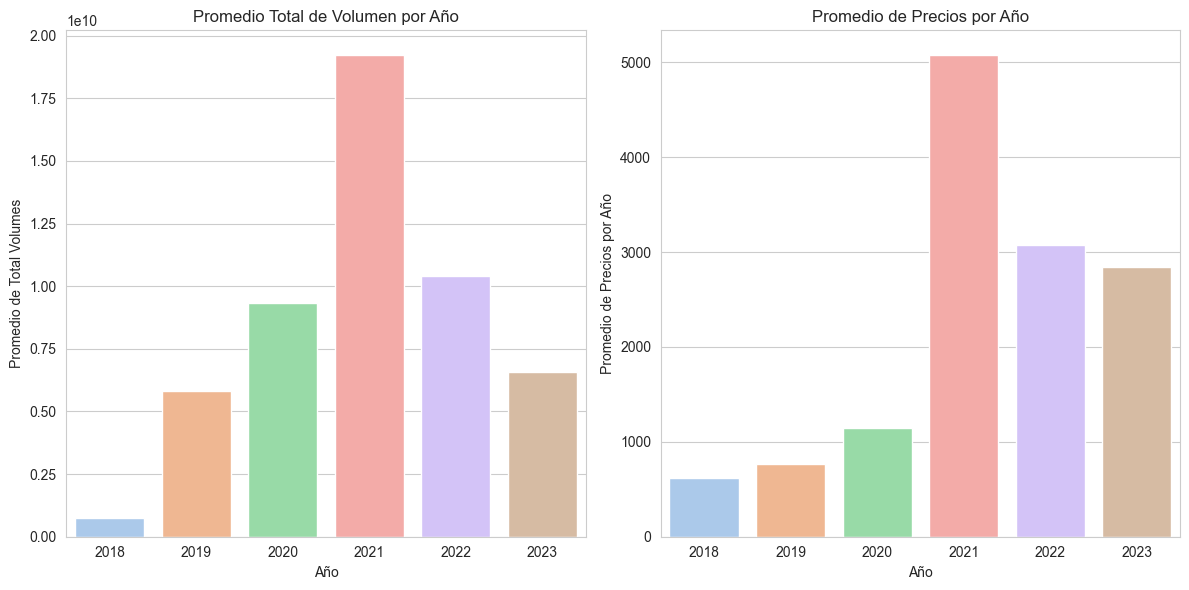

In [32]:
# Calcular el promedio de total_volumes por año
avg_volumes_by_year = coins.groupby('year')['total_volumes'].mean()

# Calcular el promedio de precios por año
avg_prices_by_year = coins.groupby('year')['prices'].mean()

# Crear una figura con dos subplots en una fila
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Primer gráfico: Promedio Total de Volumen por Año
sns.set_palette("pastel")
sns.barplot(x=avg_volumes_by_year.index, y=avg_volumes_by_year.values, ax=axs[0])
axs[0].set_title('Promedio Total de Volumen por Año')
axs[0].set_xlabel('Año')
axs[0].set_ylabel('Promedio de Total Volumes')

# Segundo gráfico: Promedio de precios por Año
sns.set_palette("pastel")
sns.barplot(x=avg_prices_by_year.index, y=avg_prices_by_year.values, ax=axs[1])
axs[1].set_title('Promedio de Precios por Año')
axs[1].set_xlabel('Año')
axs[1].set_ylabel('Promedio de Precios por Año')

# Ajustar el diseño de los gráficos
plt.tight_layout()
plt.show()

En principio parece haber una relación entre el volumen y el precio. Y esto es evidente en algunos años. Pero no sucede lo mismo siempre. El año 2020, por ejemplo, hubo un alto volumen de transacciones, pero el precio no subió en la misma proporción. De igual manera en el año 2018 el volumen fue bajo y el precio subio en mayor proporción. Fijémonos que el precio promedio del 2018 es cercano al del 2019, pero el volumen del 2018 está alejado del volumen del 2019. 

Por otra parte, el 2021 es el pico conocido producido durante la pandemia y otros factores externos y la caída pronunciada que siguió. En la actualidad el precio del mercado de criptomonedas se encuentra a la baja y su caída desde el 2021 representa un -44.13%. 
 

In [33]:
# Filtrar los datos para incluir solo los años 2021 y 2023
filtered_coins = coins[(coins['year'] == 2021) | (coins['year'] == 2023)]

# Calcular el precio promedio por año
avg_prices_by_year = filtered_coins.groupby('year')['prices'].mean()

# Calcular la variación en porcentaje entre 2021 y 2023
percentage_change = ((avg_prices_by_year[2023] - avg_prices_by_year[2021]) / avg_prices_by_year[2021]) * 100

print(f"La caída promedio en el precio desde 2021 a 2023 es: {percentage_change:.2f}%")

La caída promedio en el precio desde 2021 a 2023 es: -44.00%


El mercado de criptomonedas como el mercado bursatil depende mucho de la percepción de confianza que tienen los inversores. En este sentido, hemos visto que Bitcoin es la criptomoneda que domina el mercado, por eso sus movimientos tienden a influir en en las percepciones de los inversores hacia otras criptomonedas. Así, cuando el precio del bitcoin sube o baja puede desencadenar un efecto de arrastre (domino effect). Consideremos además que en muchos intercambios de criptomonedas, en lugar de utilizar monedas fiduciarias (como dólares o euros) como unidad de medida para establecer el precio de una criptomoneda, se utiliza Bitcoin como punto de referencia. 

En el siguiente gráfico podemos observar su relación con el precio de otras criptomonedas: 

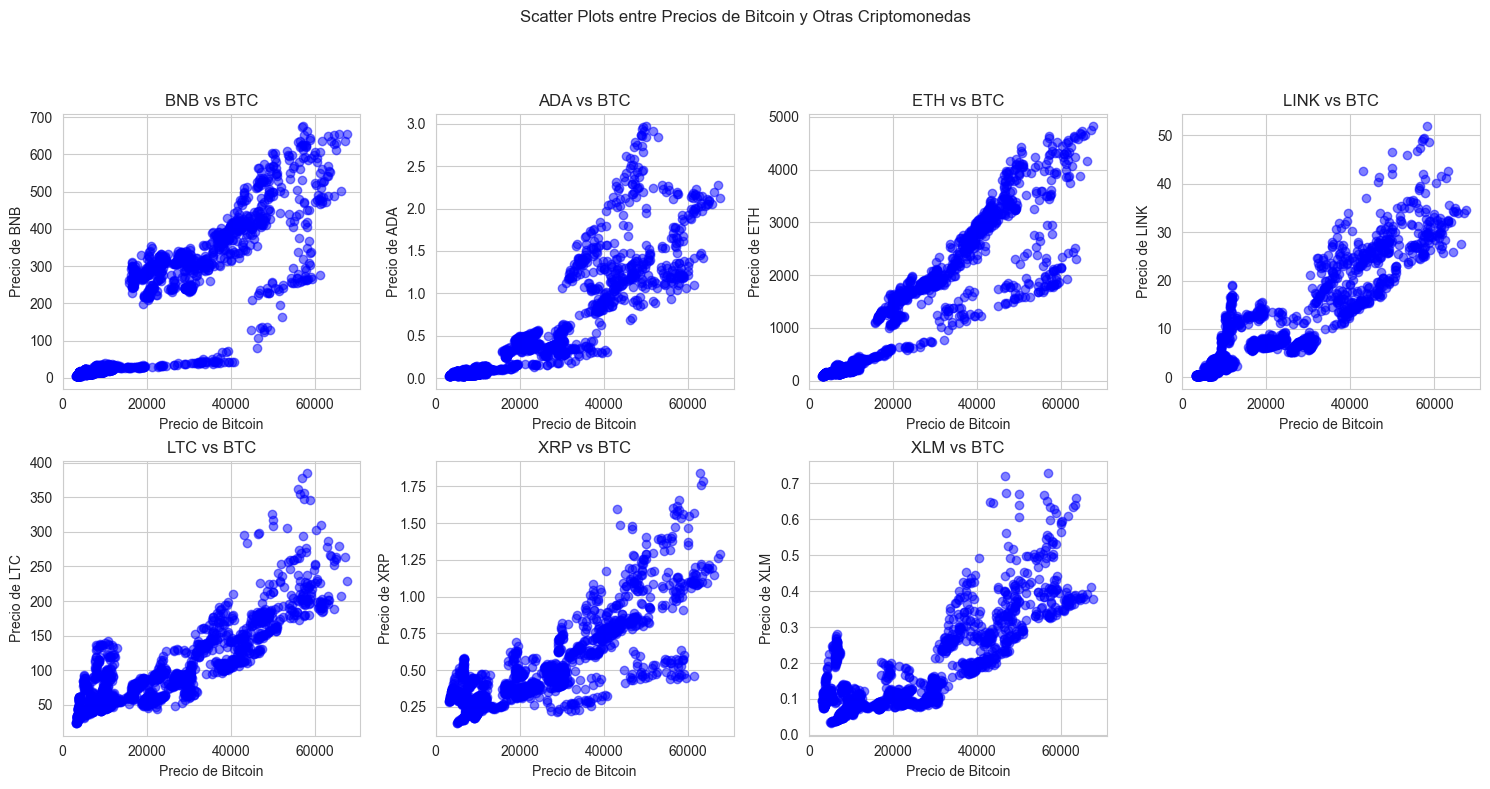

In [34]:
# Filtrar los datos para Bitcoin
btc_data = coins[coins['ticker'] == 'BTC']

# Lista de tickers de las otras criptomonedas
other_tickers = ['BNB', 'ADA', 'ETH', 'LINK', 'LTC', 'XRP', 'XLM']

# Crear subplots en una cuadrícula
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
fig.suptitle('Scatter Plots entre Precios de Bitcoin y Otras Criptomonedas')

# Iterar a través de los subplots y los tickers de las otras criptomonedas
for idx, ax in enumerate(axes.flatten()):
    if idx < len(other_tickers):
        ticker = other_tickers[idx]
        other_data = coins[coins['ticker'] == ticker]
        
        ax.scatter(btc_data['prices'], other_data['prices'], color='blue', alpha=0.5)
        ax.set_title(f'{ticker} vs BTC')
        ax.set_xlabel('Precio de Bitcoin')
        ax.set_ylabel(f'Precio de {ticker}')
        ax.grid(True)

# Eliminar el último subplot vacío
fig.delaxes(axes[1, 3])

# Ajustar el espacio entre los subplots
plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Mostrar los scatter plots
plt.show()

No podemos decir que la tendencia esté igual de correlacionada en todas las criptos, pero de forma general podemos observar que hay una relación evidente entre el precio de bitcoin y el precio de las demás criptomonedas. 

Pasemos a considerar ahora otro elemento importante : la volatilidad de los precios. 

In [35]:
# Lista de los tickers de las diez criptomonedas
tickers = ['BTC', 'BNB', 'ADA', 'ETH', 'LINK', 'LTC', 'XRP', 'XLM', 'USDT', 'USDC']

# Crear una lista para almacenar los resultados
results = []

# Iterar a través de los tickers de las diez criptomonedas
for ticker in tickers:
    # Filtrar los datos por criptomonedada
    coin_data = coins[coins['ticker'] == ticker]
    
    # Calcular la desviación estándar de los precios por año
    std_by_year = coin_data.groupby('year')['prices'].std()
    
    # Calcular el promedio de las desviaciones estándar
    average_std = std_by_year.mean()
    
    # Agregar el resultado a la lista de resultados
    results.append({'Ticker': ticker, 'Avg_volatility': average_std})

# Crear un DataFrame con los resultados
results_std = pd.DataFrame(results)

# Ordenar los resultados de mayor a menor por desviación estándar promedio
results_std_sorted = results_std.sort_values(by='Avg_volatility', ascending=False)

# Mostrar los resultados ordenados
print("Volatilidad Promedio anual de las diez Criptomonedas:")
print(results_std_sorted)

Volatilidad Promedio anual de las diez Criptomonedas:
  Ticker  Avg_volatility
0    BTC     5316.853261
3    ETH      374.325140
1    BNB       49.051607
5    LTC       23.898303
4   LINK        3.071360
2    ADA        0.176496
6    XRP        0.148736
7    XLM        0.048111
9   USDC        0.004298
8   USDT        0.002722


En la parte inferior tenemos a las stablecoins cuya volatilidad promedio interanual es practicamente igual a cero. Mientras que en el otro extremo tenemos a Bitcoin. Si establecemos una escala de volatilidad tomando como límites estas criptomonedas obtenemos lo siguiente:
* Volatilidad baja (Valores entre 0 y 20): USDT, USDC, stellar ripple, cardano y chainlink. 
* Volatilidad media(Valores entre 20 y 100): binance coin, litecoin
* Volatilidad alta(Valores mayores a 100): bitcoin, ethereum.

El problema es que la volatilidad de bitcoin es 14.2 veces mayor que la de ethereum. A su vez la volatilidad de Ethereum es 7.63 veces superior a la de binance coin, la moneda que le sigue. Estas diferencias considerables entre Bitcoin y Ethereum con respecto al resto y entre ellas es un factor a considerar para el inversor. Nosotros las hemos categorizado como de alta volatilidad, pero presentan grados muy altos y diferentes de riesgo. 

En cuanto a las de volatilidad media, si bien Binance coin tiene una volatilidad de más del doble de litecoin pueden considerarse dos opciones de inversión moderadas dentro del contexto del análisis que venimos realizando. 

Por otra parte, que ripple, stellar, cardano y chainlink tengan una volatildiad promedio similar a las stablecoins nos indica que también son monedas de bajo riesgo. Todas alcanzaron un pico en el 2021, pero después han ido retomando su rango habitual de precios.(Ver el gráfico de abajo). 

In [36]:
# Agregamos al dataframe una columna categórica de volatilidad para una mejor visualización 
data_std = {
    'Ticker': ['BTC', 'ETH', 'BNB', 'LTC', 'LINK', 'ADA', 'XRP', 'XLM', 'USDC', 'USDT'],
    'Average Standard Deviation': [5316.726008, 374.408666, 49.038352, 23.890145, 3.071576, 0.176484, 0.148752, 0.048067, 0.004299, 0.002723]
}

results_std_sorted = pd.DataFrame(data_std)

# Agregar la columna volatility_category
def categorize_volatility(row):
    if row['Average Standard Deviation'] < 20:
        return 'Volatilidad baja'
    elif row['Average Standard Deviation'] < 100:
        return 'Volatilidad media'
    else:
        return 'Volatilidad alta'

results_std_sorted['volatility_category'] = results_std_sorted.apply(categorize_volatility, axis=1)

print(results_std_sorted)

  Ticker  Average Standard Deviation volatility_category
0    BTC                 5316.726008    Volatilidad alta
1    ETH                  374.408666    Volatilidad alta
2    BNB                   49.038352   Volatilidad media
3    LTC                   23.890145   Volatilidad media
4   LINK                    3.071576    Volatilidad baja
5    ADA                    0.176484    Volatilidad baja
6    XRP                    0.148752    Volatilidad baja
7    XLM                    0.048067    Volatilidad baja
8   USDC                    0.004299    Volatilidad baja
9   USDT                    0.002723    Volatilidad baja


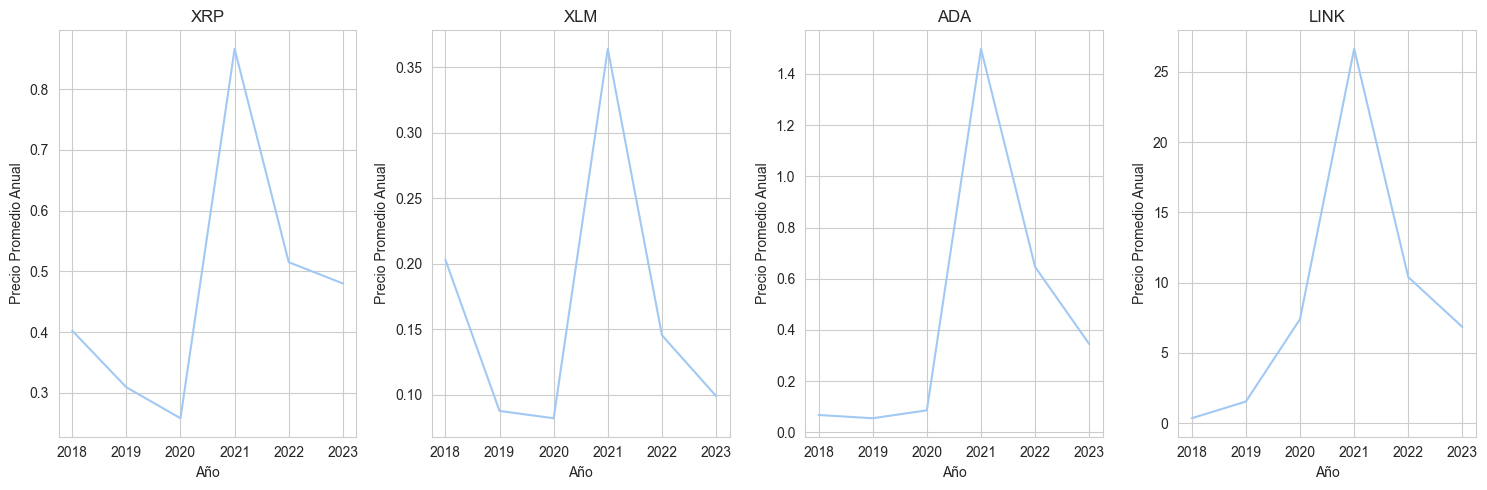

In [37]:
# Filtrar los datos para las criptomonedas seleccionadas y el período deseado
selected_coins = ['XRP', 'XLM', 'ADA', 'LINK']
start_year = 2018
end_year = 2023

filtered_data = coins[(coins['ticker'].isin(selected_coins)) & (coins['year'] >= start_year) & (coins['year'] <= end_year)]

# Calcular el precio promedio anual para cada criptomoneda
average_prices = filtered_data.groupby(['ticker', 'year'])['prices'].mean().reset_index()

# Crear una figura con tres subplots
fig, axes = plt.subplots(1, len(selected_coins), figsize=(15, 5))

# Iterar a través de las criptomonedas seleccionadas y trazar sus precios promedio como gráfico de línea
for idx, coin in enumerate(selected_coins):
    coin_data = average_prices[average_prices['ticker'] == coin]
    axes[idx].plot(coin_data['year'], coin_data['prices'])
    axes[idx].set_title(coin)
    axes[idx].set_xlabel('Año')
    axes[idx].set_ylabel('Precio Promedio Anual')
    axes[idx].grid(True)

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar los gráficos de línea
plt.show()

En estos cuatro gráficos podemos notar lo que decíamos: las cuatro criptos calificadas de baja volatilidad (fuera de las stablecoins) alcanzan un pico en el 2021 y de inmediato empiezan a descender a su rango habitual de precios. 

Lo que debemos indagar ahora es cómo se relaciona el grado de volatilidad con el rendimiento de cada criptomoneda. Con este propósito calcularemos el promedio anual de rendimiento de cada cripto y a su vez a estos promedios anuales le extraeremos el total: 

In [38]:
# Lista de los tickers de las diez criptomonedas
tickers = ['BTC', 'BNB', 'ADA', 'ETH', 'LINK', 'LTC', 'XRP', 'XLM', 'USDT', 'USDC']

# Crear una lista para almacenar los resultados
results = []

# Iterar a través de los tickers de las diez criptomonedas
for ticker in tickers:
    # Filtrar los datos para la moneda
    coin_data = coins[coins['ticker'] == ticker]
    
    # Filtrar los datos para el período entre el año 2018 y el año 2023
    filtered_data = coin_data[(coin_data['year'] >= 2018) & (coin_data['year'] <= 2023)]
    
    # Calcular los rendimientos anuales en porcentaje
    yearly_returns = []
    for year in range(2018, 2024):
        year_data = filtered_data[filtered_data['year'] == year]
        initial_price = year_data['prices'].iloc[0]
        final_price = year_data['prices'].iloc[-1]
        yearly_return = ((final_price - initial_price) / initial_price) * 100
        yearly_returns.append(yearly_return)
    
    # Calcular el rendimiento promedio histórico en porcentaje
    historical_return = sum(yearly_returns) / len(yearly_returns)
    
    # Agregar el resultado a la lista de resultados
    results.append({'Ticker': ticker, 'Historical Return': historical_return})

# Crear un DataFrame con los resultados y ordenar de mayor a menor rendimiento
rendimiento_avg = pd.DataFrame(results)
rendimiento_avg = rendimiento_avg.sort_values(by='Historical Return', ascending=False)

# Formatear los valores de rendimiento en el DataFrame
rendimiento_avg['Historical Return'] = rendimiento_avg['Historical Return'].apply(lambda x: f'{x:.2f}%')

print("Rendimiento Promedio Histórico de las Diez Criptomonedas (2018-2023):")
print(rendimiento_avg)

Rendimiento Promedio Histórico de las Diez Criptomonedas (2018-2023):
  Ticker Historical Return
1    BNB           249.94%
4   LINK           183.91%
2    ADA           161.02%
3    ETH           136.85%
0    BTC            72.03%
6    XRP            50.22%
7    XLM            35.39%
5    LTC            31.66%
8   USDT             0.08%
9   USDC            -0.10%


In [39]:
# Lista de los tickers de las diez criptomonedas
tickers = ['BTC', 'BNB', 'ADA', 'ETH', 'LINK', 'LTC', 'XRP', 'XLM', 'USDT', 'USDC']

# Crear una lista para almacenar los resultados
results = []

# Iterar a través de los tickers de las diez criptomonedas
for ticker in tickers:
    # Filtrar los datos para la moneda
    coin_data = coins[coins['ticker'] == ticker]
    
    # Filtrar los datos para el período entre el año 2018 y el año 2023
    filtered_data = coin_data[(coin_data['year'] >= 2018) & (coin_data['year'] <= 2023)]
    
    # Calcular los rendimientos anuales en porcentaje
    yearly_returns = []
    for year in range(2018, 2024):
        year_data = filtered_data[filtered_data['year'] == year]
        initial_price = year_data['prices'].iloc[0]
        final_price = year_data['prices'].iloc[-1]
        yearly_return = ((final_price - initial_price) / initial_price) * 100
        yearly_returns.append(yearly_return)
    
    # Calcular el rendimiento promedio histórico en porcentaje
    historical_return = sum(yearly_returns) / len(yearly_returns)
    
    # Agregar el resultado a la lista de resultados
    results.append({'Ticker': ticker, 'Historical Return': historical_return})

# Crear un DataFrame con los resultados y ordenar de mayor a menor rendimiento
rendimiento_avg = pd.DataFrame(results)
rendimiento_avg = rendimiento_avg.sort_values(by='Historical Return', ascending=False)

# Formatear los valores de rendimiento en el DataFrame
rendimiento_avg['Historical Return'] = rendimiento_avg['Historical Return'].apply(lambda x: f'{x:.2f}')

print("Rendimiento Promedio Histórico de las Diez Criptomonedas (2018-2023):")
print(rendimiento_avg)

Rendimiento Promedio Histórico de las Diez Criptomonedas (2018-2023):
  Ticker Historical Return
1    BNB            249.94
4   LINK            183.91
2    ADA            161.02
3    ETH            136.85
0    BTC             72.03
6    XRP             50.22
7    XLM             35.39
5    LTC             31.66
8   USDT              0.08
9   USDC             -0.10


In [40]:
crypto_ids = ['binancecoin', 'bitcoin', 'cardano', 'chainlink', 'ethereum', 'ripple', 'stellar', 'tether', 'litecoin', 'usd-coin']

In [41]:
crypto_ids = ['binancecoin', 'bitcoin', 'cardano', 'chainlink', 'ethereum', 'ripple', 'stellar', 'tether', 'litecoin', 'usd-coin']
rendimiento_avg['id'] = crypto_ids

In [42]:
rendimiento_avg

,Ticker,Historical Return,id
1,BNB,249.94,binancecoin
4,LINK,183.91,bitcoin
2,ADA,161.02,cardano
3,ETH,136.85,chainlink
0,BTC,72.03,ethereum
6,XRP,50.22,ripple
7,XLM,35.39,stellar
5,LTC,31.66,tether
8,USDT,0.08,litecoin
9,USDC,-0.10,usd-coin


In [43]:

# Convertir las columnas numéricas a cadenas de texto
rendimiento_avg['Historical Return'] = rendimiento_avg['Historical Return'].astype(str)

# Reemplazar puntos por comas en las columnas numéricas convertidas
rendimiento_avg['Historical Return'] = rendimiento_avg['Historical Return'].str.replace('.', ',')

In [44]:
rendimiento_avg.to_csv('data/avg_return.csv', index=False, sep=';')

Ahora unimos los resultados de la volatilidad con los del rendimiento para facilitar la comparación:

In [56]:
# Unir los DataFrames en base a la columna 'Ticker'
new_results = results_std_sorted.merge(rendimiento_avg, on='Ticker')
new_results

,Ticker,Average Standard Deviation,volatility_category,Historical Return
0,BTC,5316.726008,Volatilidad alta,72.03
1,ETH,374.408666,Volatilidad alta,136.85
2,BNB,49.038352,Volatilidad media,249.94
3,LTC,23.890145,Volatilidad media,31.66
4,LINK,3.071576,Volatilidad baja,183.91
5,ADA,0.176484,Volatilidad baja,161.02
6,XRP,0.148752,Volatilidad baja,50.22
7,XLM,0.048067,Volatilidad baja,35.39
8,USDC,0.004299,Volatilidad baja,-0.10
9,USDT,0.002723,Volatilidad baja,0.08


Fijémonos que no hay una correlación directa entre una mayor volatilidad y el rendimiento de cada cripto. Es decir, un mayor riesgo no necesariamente implica mayor retorno. Binance coin es la moneda con mejor rendimiento y calificamos su volatilidad como media. Le sigue chainlink cuya volatilidad calificamos de baja. Después sigue cardano también calificada de volatilidad baja. Solo en cuarto lugar aparece ethereum de volatilidad alta. Continúa bitcoin, ripple, stellar, litecoin y finalmente las stablecoins. 


#### Conclusiones

* Bitcoin domina el mercado y sus movimientos deben ser siempre monitoreados porque influye en las cotizaciones del resto de criptomonedas. 
* Tomando como muestra nuestras 10 criptomonedas deducimos que el mercado se encuentra con una tendencia a la baja con una caída desde el 2021 de -44.13% hasta la realización de este informe. 
* Existe una relación directa entre los precios y la capitalización de mercado. Pero estas variables no son suficientes para la toma de decisiones. 
* Establecimos según su volatilidad las siguiente clasificación: 
Volatilidad baja (Valores entre 0 y 20): USDT, USDC, stellar ripple, cardano y chainlink. 
Volatilidad media(Valores entre 20 y 100): binance coin, litecoin.
Volatilidad alta(Valores mayores a 100): bitcoin, ethereum.
* El promedio total de volumen por año no tiene una relación directa con el precio de las monedas. 
* Una mayor volatilidad no implica una mayor tasa de rendimiento promedio. Bitcoin es la más volátil, pero ocupa el quinto lugar de rendimiento. En primer lugar se encuentra binance coin con volatilidad media y le siguen chainlink y cardano con volatilidad baja. En cuarto lugar reicén aparece ethereum con volatilidad alta. 
* Las stablecoins tienen una volatilidad casi igual a cero: USDC: 0.004299, USDT: 0.002723.  
* USDC es la única criptomoneda que muestra rendimientos negativos a 5 años. Aunque estos rendimientos negativos son casi nulos: USDC: -0.10%. Le sigue otra stablecoin: USDT: 0.08%. El resto de criptomonedas presenta rendimientos superiores a 30% en cinco años. Sin embargo, el mercado de criptomonedas es muy reciente y no está regularizado. 
 

In [57]:
#Exportamos dataframes para agilizar la visualización de datos en PowerBi
results_std_sorted

,Ticker,Average Standard Deviation,volatility_category
0,BTC,5316.726008,Volatilidad alta
1,ETH,374.408666,Volatilidad alta
2,BNB,49.038352,Volatilidad media
3,LTC,23.890145,Volatilidad media
4,LINK,3.071576,Volatilidad baja
5,ADA,0.176484,Volatilidad baja
6,XRP,0.148752,Volatilidad baja
7,XLM,0.048067,Volatilidad baja
8,USDC,0.004299,Volatilidad baja
9,USDT,0.002723,Volatilidad baja


In [58]:
# Lista de crypto_ids
crypto_ids = ['binancecoin', 'bitcoin', 'cardano', 'chainlink', 'ethereum', 'ripple', 'stellar', 'tether', 'litecoin', 'usd-coin']

# Agregar la columna "crypto_id" al DataFrame
new_results['id'] = crypto_ids

In [59]:
new_results

,Ticker,Average Standard Deviation,volatility_category,Historical Return,id
0,BTC,5316.726008,Volatilidad alta,72.03,binancecoin
1,ETH,374.408666,Volatilidad alta,136.85,bitcoin
2,BNB,49.038352,Volatilidad media,249.94,cardano
3,LTC,23.890145,Volatilidad media,31.66,chainlink
4,LINK,3.071576,Volatilidad baja,183.91,ethereum
5,ADA,0.176484,Volatilidad baja,161.02,ripple
6,XRP,0.148752,Volatilidad baja,50.22,stellar
7,XLM,0.048067,Volatilidad baja,35.39,tether
8,USDC,0.004299,Volatilidad baja,-0.10,litecoin
9,USDT,0.002723,Volatilidad baja,0.08,usd-coin


In [60]:
# Reemplazar puntos por comas en las columnas numéricas

# Convertir las columnas numéricas a cadenas de texto
new_results['Average Standard Deviation'] = new_results['Average Standard Deviation'].astype(str)
new_results['Historical Return'] = new_results['Historical Return'].astype(str)

# Reemplazar puntos por comas en las columnas numéricas convertidas
new_results['Average Standard Deviation'] = new_results['Average Standard Deviation'].str.replace('.', ',')
new_results['Historical Return'] = new_results['Historical Return'].str.replace('.', ',')


In [61]:
new_results.to_csv('data/historic.csv', index=False, sep=';')

In [20]:
new_results.to_csv('data/retorno.csv', index=False)

In [21]:
#Exportamos este dataframe para agilizar la visualización de datos en PowerBi.
#En PowerBi lo uniremos al modelo a través de la columna ticker
results_std_sorted.to_csv('data/category_volatility.csv', index=False)

In [72]:
results_df

,Ticker,Average Standard Deviation
0,BTC,5316.660754
1,BNB,49.038285
2,ADA,0.176485
3,ETH,374.408011
4,LINK,3.071557
5,LTC,23.890248
6,XRP,0.148751
7,XLM,0.048070
8,USDT,0.002728
9,USDC,0.004299
